In [1]:
# import for the lesson
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# import data 
from vega_datasets import data

# look at the data
data.sf_temps()

,temp,date
0,47.8,2010-01-01 00:00:00
1,47.4,2010-01-01 01:00:00
2,46.9,2010-01-01 02:00:00
3,46.5,2010-01-01 03:00:00
4,46.0,2010-01-01 04:00:00
...,...,...
8754,50.4,2010-12-31 19:00:00
8755,49.9,2010-12-31 20:00:00
8756,49.4,2010-12-31 21:00:00
8757,48.8,2010-12-31 22:00:00


In [3]:
# figure type 
type(data)

vega_datasets.core.DataLoader

# 1
Resample by the day and take the average temperature. Visualize the average temperature over time.

In [4]:
# turn data into pandas 
df = pd.DataFrame(data.sf_temps())

type(df), df.head()

(pandas.core.frame.DataFrame,
    temp                date
 0  47.8 2010-01-01 00:00:00
 1  47.4 2010-01-01 01:00:00
 2  46.9 2010-01-01 02:00:00
 3  46.5 2010-01-01 03:00:00
 4  46.0 2010-01-01 04:00:00)

In [5]:
df.head()

,temp,date
0,47.8,2010-01-01 00:00:00
1,47.4,2010-01-01 01:00:00
2,46.9,2010-01-01 02:00:00
3,46.5,2010-01-01 03:00:00
4,46.0,2010-01-01 04:00:00


In [6]:
# To resamole the DF has to have a DateTime Index

df = df.set_index('date').sort_index()
df

,temp
date,
2010-01-01 00:00:00,47.8
2010-01-01 01:00:00,47.4
2010-01-01 02:00:00,46.9
2010-01-01 03:00:00,46.5
2010-01-01 04:00:00,46.0
...,...
2010-12-31 19:00:00,50.4
2010-12-31 20:00:00,49.9
2010-12-31 21:00:00,49.4


In [7]:
# resample data by day and take the average temperature
df_by_day = df.resample('1d').temp.mean()
type(df_by_day), df_by_day.head()

(pandas.core.series.Series,
 date
 2010-01-01    49.170833
 2010-01-02    49.304167
 2010-01-03    49.391667
 2010-01-04    49.445833
 2010-01-05    49.491667
 Freq: D, Name: temp, dtype: float64)

<AxesSubplot:title={'center':'Average Temperature Over time'}, xlabel='date', ylabel='Temperature'>

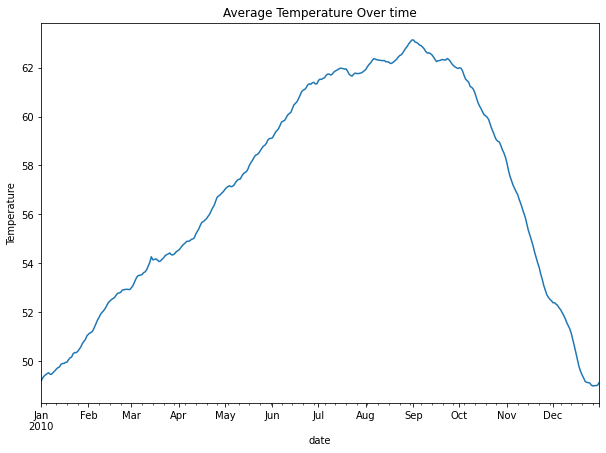

In [8]:
plt.figure(figsize=(10, 7))
plt.title('Average Temperature Over time')
plt.ylabel('Temperature')
df_by_day.plot()

# 2
Write the code necessary to visualize the minimum temperature over time.

In [9]:
df.temp.min()

45.6

In [10]:
# resample data by week and take the mimum temperature over time
min_temp_over_time = df.resample('1w').temp.min()

<AxesSubplot:title={'center':'Minimum Temperature Overtiem by Week'}, xlabel='date', ylabel='Temperature'>

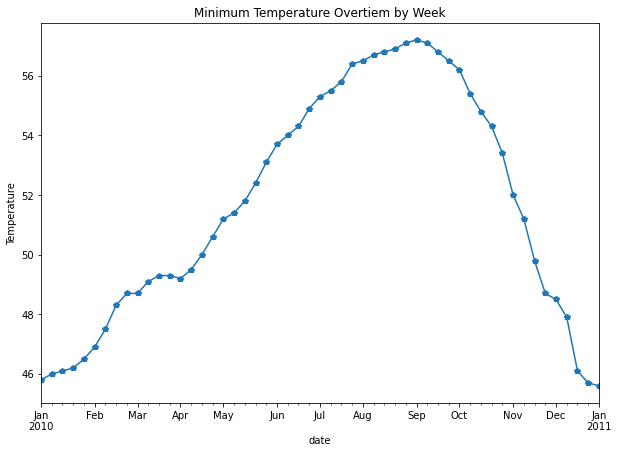

In [11]:
plt.figure(figsize=(10, 7))
plt.title('Minimum Temperature Overtiem by Week')
plt.ylabel('Temperature')
min_temp_over_time.plot(marker='p')

# 3
Write the code necessary to visualize the maximum temperature over time.

In [12]:
# resample data by week and take the maximum temperature over time
max_temp_over_time = df.resample('1w').temp.max()

<AxesSubplot:title={'center':'Maximum Temperature Overtiem by Week'}, xlabel='date', ylabel='Temperature'>

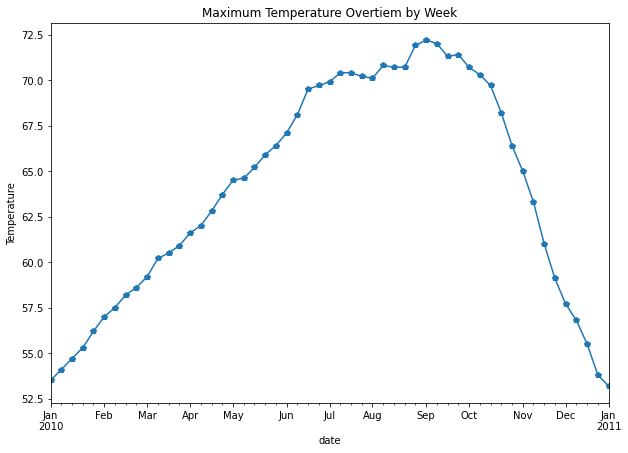

In [13]:
plt.figure(figsize=(10, 7))
plt.title('Maximum Temperature Overtiem by Week')
plt.ylabel('Temperature')
max_temp_over_time.plot(marker='p')

# 4
Which month is the coldest, on average?

In [14]:
# create DF and resample data by month whilke taking the the average temperature for 'temp' values
# Data frame averages temperature by month
data_by_month = df.resample('1m').temp.mean()
type(data_by_month)

pandas.core.series.Series

In [15]:
# convert series into DF 
data_by_month = pd.DataFrame (data_by_month)
data_by_month.head()

,temp
date,
2010-01-31,49.984140
2010-02-28,52.243899
2010-03-31,53.956528
2010-04-30,55.633056
2010-05-31,57.970968


In [16]:
# print record with the minimum temperature of the data_by_month DF
print(data_by_month[data_by_month.temp == data_by_month.temp.min()])

                temp
date                
2010-01-31  49.98414


In [17]:
# print the name of the month with average minimum temperature
print(data_by_month[data_by_month.temp == data_by_month.temp.min()].index.month_name())

Index(['January'], dtype='object', name='date')


# 5
Which month has the highest average temperature?


In [18]:
# print record with the maximum temperature of the data_by_month DF
print(data_by_month[data_by_month.temp == data_by_month.temp.max()])

                 temp
date                 
2010-09-30  62.487083


In [19]:
# print the name of the month with the highst average maximum temperature
print(data_by_month[data_by_month.temp == data_by_month.temp.max()].index.month_name())

Index(['September'], dtype='object', name='date')


# 6
Resample by the day and calculate the min and max temp for the day (Hint: .agg(['min', 'max'])). Use this resampled dataframe to calculate the change in temperature for the day. Which month has the highest daily temperature variability?

In [20]:
# create a min_max DF and resample data by day
min_max_data = df.resample('1d').temp.agg(['min', 'max'])
min_max_data.head()

,min,max
date,,
2010-01-01,45.8,53.3
2010-01-02,46.0,53.4
2010-01-03,46.1,53.5
2010-01-04,46.1,53.6
2010-01-05,46.1,53.8


In [21]:
# Create series with the changes in teperature
temp_change =  min_max_data['max'] - min_max_data['min']

In [22]:
type(temp_change)

pandas.core.series.Series

In [23]:
# turn series to pandas DF
temp_change = pd.DataFrame(temp_change)
# Rename colum 0 to temp_change
temp_change.rename(columns={0: 'temp_change'}, inplace=True)
temp_change.head(10)

,temp_change
date,
2010-01-01,7.5
2010-01-02,7.4
2010-01-03,7.4
2010-01-04,7.5
2010-01-05,7.7
2010-01-06,7.7
2010-01-07,7.8
2010-01-08,7.9
2010-01-09,8.0


In [24]:
min_max_temp_change = min_max_data
# min_max_temp_change = min_max_data['temp_change'] = temp_change.temp_change
min_max_temp_change['temp_change'] = temp_change.temp_change

In [25]:
min_max_temp_change.head(13)

,min,max,temp_change
date,,,
2010-01-01,45.8,53.3,7.5
2010-01-02,46.0,53.4,7.4
2010-01-03,46.1,53.5,7.4
2010-01-04,46.1,53.6,7.5
2010-01-05,46.1,53.8,7.7
2010-01-06,46.1,53.8,7.7
2010-01-07,46.0,53.8,7.8
2010-01-08,46.0,53.9,7.9
2010-01-09,46.0,54.0,8.0


In [26]:
most_variavilty_month = min_max_temp_change.resample('1m').temp_change.sum()

In [27]:
most_variavilty_month.max()

433.3

In [28]:
most_variavilty_month = pd.DataFrame(most_variavilty_month)

In [29]:
# print the 
print(most_variavilty_month[most_variavilty_month.temp_change == most_variavilty_month.temp_change.max()].index.month_name())

Index(['July'], dtype='object', name='date')


# 7 Bonus
Bonus: Visualize the daily min, average, and max temperature over time on a single line plot, i.e. the min, average, and maximum temperature should be 3 seperate lines.


<AxesSubplot:xlabel='date'>

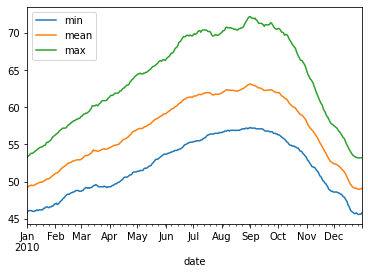

In [30]:

# use .agg to create the columns for min, max, mean
df.temp.resample('d').agg(['min', 'mean', 'max']).plot()

-------------------------------------------------
# Seattle Weather

In [31]:
# import seattle_weather as the data frame mine information from
from vega_datasets import data

# know data structure we are working with
type(data.seattle_weather())

pandas.core.frame.DataFrame

In [32]:
# Set proper name for DF
seattle_weather = data.seattle_weather()

# 1 
Which year and month combination has the highest amount of precipitation?
mont?

In [33]:
seattle_weather.sample(2)

,date,precipitation,temp_max,temp_min,wind,weather
728,2013-12-29,0.0,7.2,1.7,1.1,sun
828,2014-04-08,4.6,15.6,8.3,4.2,fog


In [34]:
# st the index of the DF to date 
seattle_weather = seattle_weather.set_index('date').sort_index()
seattle_weather.head()

,precipitation,temp_max,temp_min,wind,weather
date,,,,,
2012-01-01,0.0,12.8,5.0,4.7,drizzle
2012-01-02,10.9,10.6,2.8,4.5,rain
2012-01-03,0.8,11.7,7.2,2.3,rain
2012-01-04,20.3,12.2,5.6,4.7,rain
2012-01-05,1.3,8.9,2.8,6.1,rain


In [35]:
# resample DF by month
seatttle_by_month = seattle_weather.resample('m').sum() # precipitation.max()
seatttle_by_month.sample()

,precipitation,temp_max,temp_min,wind
date,,,,
2012-05-31,52.2,547.5,253.9,104.0


In [36]:
# print the date for the year and month with the highest precipitation 
seatttle_by_month[seatttle_by_month.precipitation == seatttle_by_month.precipitation.max()].index

DatetimeIndex(['2015-12-31'], dtype='datetime64[ns]', name='date', freq='M')

# 2
Visualize the amount of monthly precipitation over time.

<AxesSubplot:title={'center':'Monthly Precipitation Over Time'}, xlabel='date', ylabel='Precipitation'>

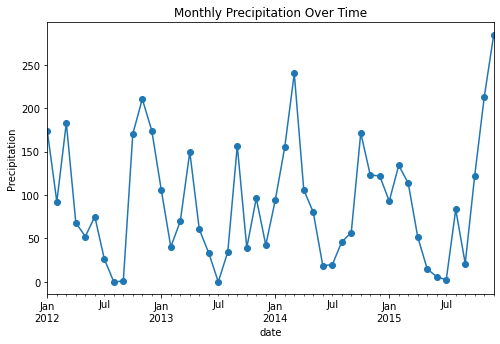

In [37]:
plt.figure(figsize=(8, 5))
plt.title('Monthly Precipitation Over Time')
plt.ylabel('Precipitation')
seattle_weather.precipitation.resample('m').sum().plot(marker= 'o')

# 3
Visualize the amount of wind over time. Choose a time interval you think is appropriate.


In [38]:
seattle_weather.tail(4)

,precipitation,temp_max,temp_min,wind,weather
date,,,,,
2015-12-28,1.5,5.0,1.7,1.3,fog
2015-12-29,0.0,7.2,0.6,2.6,fog
2015-12-30,0.0,5.6,-1.0,3.4,sun
2015-12-31,0.0,5.6,-2.1,3.5,sun


<AxesSubplot:xlabel='date'>

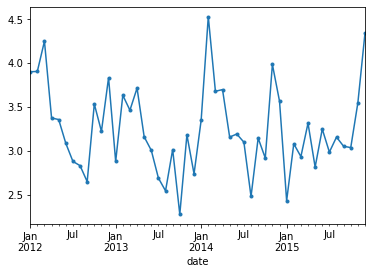

In [39]:
# resample data by month and plot it using the average value for the month
seattle_weather.wind.resample('m').mean().plot(marker='.')

# 4
Which year-month combination is the windiest?

In [40]:
# answer when data resampled by the sume wind values
seatttle_by_month[seatttle_by_month.wind == seatttle_by_month.wind.max()].index

DatetimeIndex(['2015-12-31'], dtype='datetime64[ns]', name='date', freq='M')

In [41]:
# Different way to get answer using the mean as the colection of all the months data
seattle_weather.wind.resample('m').mean().sort_values().tail(1)

date
2014-02-28    4.528571
Name: wind, dtype: float64

# 5
What's the sunniest year? (Hint: which day has the highest number of days where weather == sun?)

In [42]:
# create datafram of only sunny values
sunny_days = seattle_weather[seattle_weather.weather == 'sun']
sunny_days.head()

,precipitation,temp_max,temp_min,wind,weather
date,,,,,
2012-01-08,0.0,10.0,2.8,2.0,sun
2012-01-11,0.0,6.1,-1.1,5.1,sun
2012-01-12,0.0,6.1,-1.7,1.9,sun
2012-01-13,0.0,5.0,-2.8,1.3,sun
2012-02-02,0.0,8.3,1.7,2.6,sun


In [43]:
# create dummie value for all days in sunny_days
sunny_days['is_sunny'] = pd.get_dummies(sunny_days.weather)

<ipython-input-43-acad93351f92>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sunny_days['is_sunny'] = pd.get_dummies(sunny_days.weather)


In [44]:
sunny_days.head()

,precipitation,temp_max,temp_min,wind,weather,is_sunny
date,,,,,,
2012-01-08,0.0,10.0,2.8,2.0,sun,1
2012-01-11,0.0,6.1,-1.1,5.1,sun,1
2012-01-12,0.0,6.1,-1.7,1.9,sun,1
2012-01-13,0.0,5.0,-2.8,1.3,sun,1
2012-02-02,0.0,8.3,1.7,2.6,sun,1


In [45]:
# add resample by year and sum the sunny days per year.
# arrange reasult in accending order and get last rec0rd(record with max days where sunny)
sunny_days.is_sunny.resample('Y').sum().sort_values().tail(1)

date
2014-12-31    211
Name: is_sunny, dtype: uint8

# 6
In which month does it rain the most?

In [46]:
# create datafram of only ranny values
rainny_days = seattle_weather[seattle_weather.weather == 'rain']
rainny_days.head()

,precipitation,temp_max,temp_min,wind,weather
date,,,,,
2012-01-02,10.9,10.6,2.8,4.5,rain
2012-01-03,0.8,11.7,7.2,2.3,rain
2012-01-04,20.3,12.2,5.6,4.7,rain
2012-01-05,1.3,8.9,2.8,6.1,rain
2012-01-06,2.5,4.4,2.2,2.2,rain


In [47]:
# create dummie value for all days in sunny_days
rainny_days['it_wet_from_above'] = pd.get_dummies(rainny_days.weather)
rainny_days.head()

<ipython-input-47-e612cfb00745>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rainny_days['it_wet_from_above'] = pd.get_dummies(rainny_days.weather)


,precipitation,temp_max,temp_min,wind,weather,it_wet_from_above
date,,,,,,
2012-01-02,10.9,10.6,2.8,4.5,rain,1
2012-01-03,0.8,11.7,7.2,2.3,rain,1
2012-01-04,20.3,12.2,5.6,4.7,rain,1
2012-01-05,1.3,8.9,2.8,6.1,rain,1
2012-01-06,2.5,4.4,2.2,2.2,rain,1


In [48]:
rainny_days.it_wet_from_above.resample('m').sum().sort_values().tail(1)

date
2012-11-30    25
Name: it_wet_from_above, dtype: uint8

# 7
Which month has the most number of days with a non-zero amount of precipitation?

In [49]:
# create adata frame where all records have precipitation greater than 0
precipitation_0 = seattle_weather[seattle_weather.precipitation > 0]
precipitation_0.head()

,precipitation,temp_max,temp_min,wind,weather
date,,,,,
2012-01-02,10.9,10.6,2.8,4.5,rain
2012-01-03,0.8,11.7,7.2,2.3,rain
2012-01-04,20.3,12.2,5.6,4.7,rain
2012-01-05,1.3,8.9,2.8,6.1,rain
2012-01-06,2.5,4.4,2.2,2.2,rain


In [50]:
precipitation_0.precipitation.resample('m')
precipitation_0

,precipitation,temp_max,temp_min,wind,weather
date,,,,,
2012-01-02,10.9,10.6,2.8,4.5,rain
2012-01-03,0.8,11.7,7.2,2.3,rain
2012-01-04,20.3,12.2,5.6,4.7,rain
2012-01-05,1.3,8.9,2.8,6.1,rain
2012-01-06,2.5,4.4,2.2,2.2,rain
...,...,...,...,...,...
2015-12-23,6.1,5.0,2.8,7.6,fog
2015-12-24,2.5,5.6,2.2,4.3,fog
2015-12-25,5.8,5.0,2.2,1.5,fog


In [51]:
# precipitation_0.groupby('m')


----------------------------------------------------------
# flights_20k Data

In [52]:
flights = data.flights_20k()
flights.head()

,date,delay,distance,origin,destination
0,2001-01-13 14:56:00,32,417,SAN,SJC
1,2001-01-31 16:40:00,-5,1093,FLL,ISP
2,2001-02-11 18:39:00,3,293,LBB,DAL
3,2001-01-10 21:00:00,-15,550,MSY,MCO
4,2001-03-30 21:45:00,-2,229,STL,IND


In [53]:
# set date as index
flights = flights.set_index('date').sort_index()
flights.head()

,delay,distance,origin,destination
date,,,,
2001-01-01 00:01:00,14,405,MCI,MDW
2001-01-01 06:20:00,0,491,BNA,MCI
2001-01-01 06:30:00,-8,251,MDW,STL
2001-01-01 07:00:00,-10,361,OAK,ONT
2001-01-01 07:00:00,0,303,MSY,HOU


# 1
Convert any negative delays to 0.

In [54]:
# turn all fligts into that had negative value for delay into 0
flights.loc[flights['delay'] < 0, 'delay'] = 0 
flights.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 20000 entries, 2001-01-01 00:01:00 to 2001-03-31 21:30:00
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   delay        20000 non-null  int64 
 1   distance     20000 non-null  int64 
 2   origin       20000 non-null  object
 3   destination  20000 non-null  object
dtypes: int64(2), object(2)
memory usage: 781.2+ KB


# 2 
Which hour of the day has the highest average delay?

In [55]:
flights['hour'] = flights.index.hour
flights.head()

,delay,distance,origin,destination,hour
date,,,,,
2001-01-01 00:01:00,14,405,MCI,MDW,0
2001-01-01 06:20:00,0,491,BNA,MCI,6
2001-01-01 06:30:00,0,251,MDW,STL,6
2001-01-01 07:00:00,0,361,OAK,ONT,7
2001-01-01 07:00:00,0,303,MSY,HOU,7


In [57]:
# groupby by 'hour' and look at mean delay
flights.groupby('hour').delay.mean().sort_values().tail(1)


hour
3    302.5
Name: delay, dtype: float64

# 3
Does the day of the week make a difference in the delay amount?

In [58]:
# create a colum that gives the day_name for the data 
flights['week_day'] = flights.index.day_name()

In [59]:
# group by the week_day
flights.groupby('week_day').delay.mean()

week_day
Friday       17.757596
Monday        7.165772
Saturday      8.431498
Sunday       10.413542
Thursday     12.821322
Tuesday       9.410866
Wednesday    11.032478
Name: delay, dtype: float64

In [60]:
# use sort_values so that it is in acending order
flights.groupby('week_day').delay.mean().sort_values()

week_day
Monday        7.165772
Saturday      8.431498
Tuesday       9.410866
Sunday       10.413542
Wednesday    11.032478
Thursday     12.821322
Friday       17.757596
Name: delay, dtype: float64

# 4 
Does the month make a difference in the delay amount?

In [61]:
# create a column and groupby the month and find mean delay:
flights['month'] = flights.index.month
flights.groupby('month').delay.mean()


month
1    11.301592
2    12.306106
3     9.875287
Name: delay, dtype: float64